pgm 1

TP: 46, TN: 58, FP: 54, FN: 42
Accuracy: 0.5200
Precision: 0.4600
Recall (Sensitivity): 0.5227
F1-Score: 0.4894
Specificity: 0.5179
Negative Predictive Value: 0.5800
MCC: 0.0403
Accuracy (scikit-learn): 0.5200
Precision (scikit-learn): 0.4600
Recall (Sensitivity) (scikit-learn): 0.5227
F1-Score (scikit-learn): 0.4894
MCC (scikit-learn): 0.0403
Confusion Matrix (scikit-learn):
 [[58 54]
 [42 46]]
AUC: 0.5203


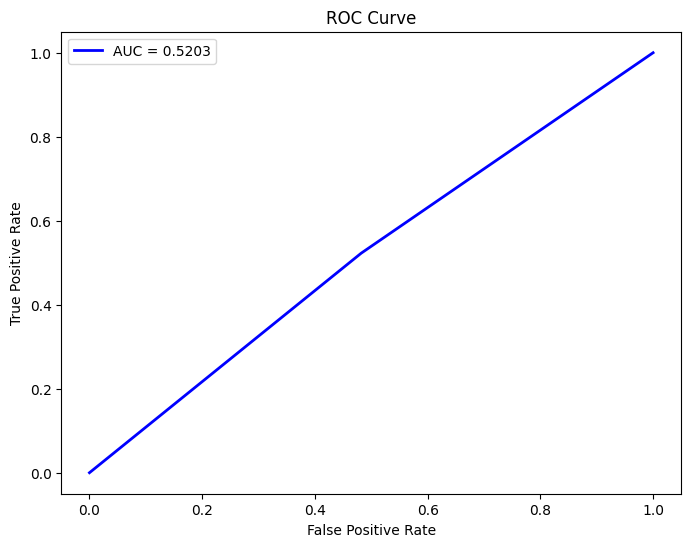

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example predictions
y_pred = np.random.randint(2, size=len(y_test))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
mcc = ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) != 0 else 0

# Print metrics
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Negative Predictive Value: {npv:.4f}")
print(f"MCC: {mcc:.4f}")

# Calculate metrics using scikit-learn
accuracy_sklearn = accuracy_score(y_test, y_pred)
precision_sklearn = precision_score(y_test, y_pred)
recall_sklearn = recall_score(y_test, y_pred)
f1_score_sklearn = f1_score(y_test, y_pred)
mcc_sklearn = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy (scikit-learn): {accuracy_sklearn:.4f}")
print(f"Precision (scikit-learn): {precision_sklearn:.4f}")
print(f"Recall (Sensitivity) (scikit-learn): {recall_sklearn:.4f}")
print(f"F1-Score (scikit-learn): {f1_score_sklearn:.4f}")
print(f"MCC (scikit-learn): {mcc_sklearn:.4f}")

# Calculate Confusion Matrix using scikit-learn
cm_sklearn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (scikit-learn):\n", cm_sklearn)

# Calculate ROC curve and AUC using scikit-learn
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f"AUC: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.4f}')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


pgm 2

In [ ]:
import pandas as pd
df=pd.read_csv('/content/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
input=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']


In [ ]:
input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [ ]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [ ]:
input['companyEnc']=le_company.fit_transform(input['company'])
input['jobEnc']=le_company.fit_transform(input['job'])
input['degreeEnc']=le_company.fit_transform(input['degree'])


In [ ]:
input

,company,job,degree,companyEnc,jobEnc,degreeEnc
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs=input.drop(['company','job','degree'],axis='columns')

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='gini')
#model=tree.DecisionTreeClassifier(criterion='entropy')


In [ ]:
model.fit(inputs,target)

DecisionTreeClassifier()

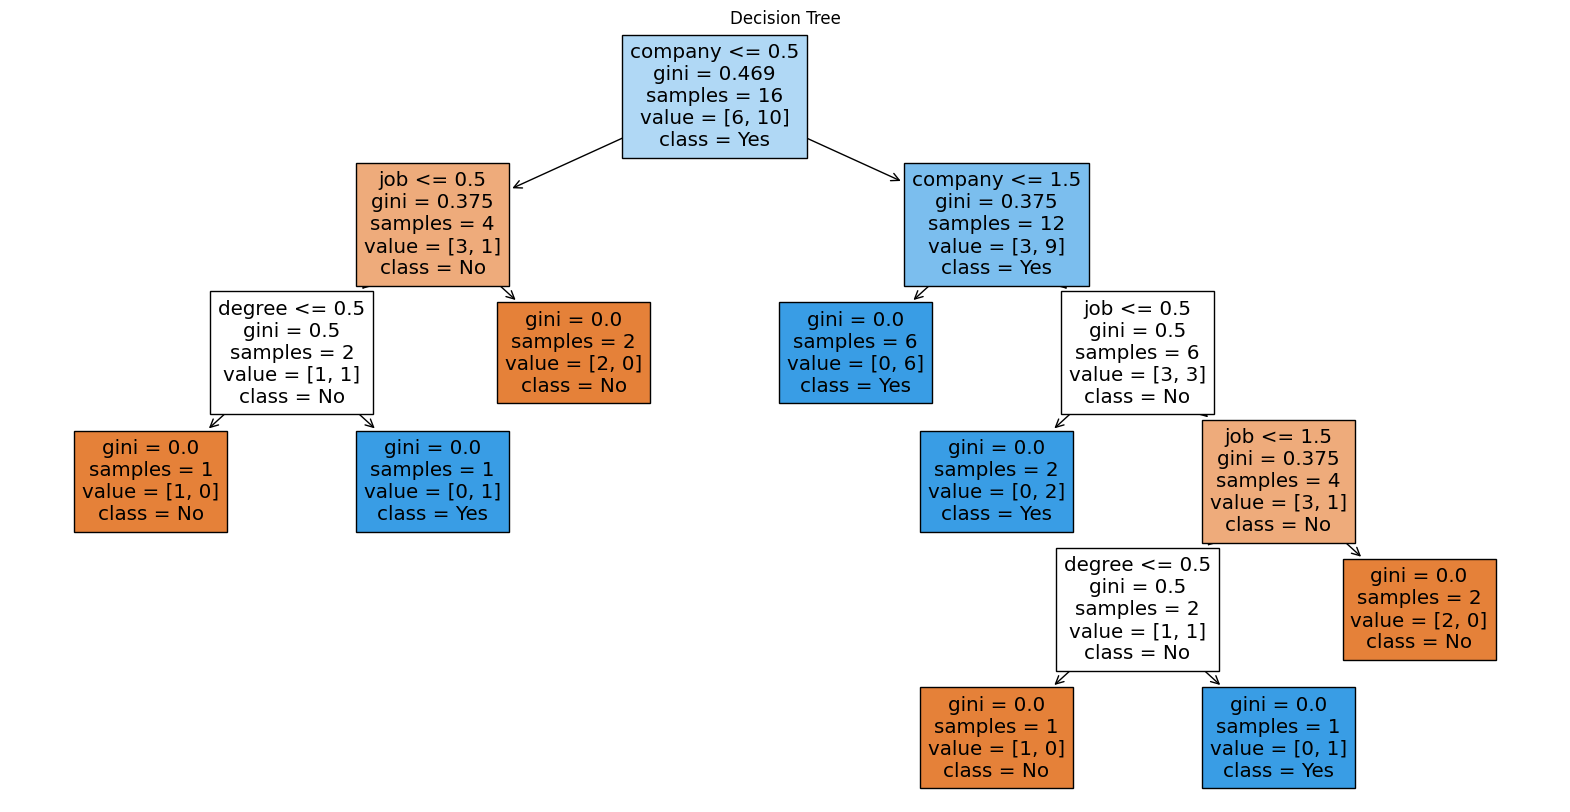

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=input.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree')
plt.show()

program 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,mean_squared_error,roc_curve,auc

In [ ]:
X,y=make_classification(n_samples=100,n_features=10,n_informative=5,n_classes=2,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# direct calc

def conf(y_true,y_pred):
  cnf=confusion_matrix(y_true,y_pred)
  tp=cnf[1][1]
  tn=cnf[0][0]
  fp=cnf[0][1]
  fn=cnf[1][0]
  return tp,tn,fp,fn

y_pred=np.random.randint(2,size=len(y_test))
tp,tn,fp,fn=conf(y_test,y_pred)



In [ ]:
print(f"accuracy : {(tp+fn)/(tp+fn+fp+tn)}")
print(f"precision : {(tp)/(tp+fp)}")
print(f"recall : {(tp)/(tp+fn)}")
print(f"f1 : {(2*tp)/(2*tp+fp+fn)}")

accuracy : 0.55
precision : 0.8333333333333334
recall : 0.45454545454545453
f1 : 0.5882352941176471


In [ ]:
print(f"root mean square error: {np.sqrt(mean_squared_error(y_test,y_pred))}")

root mean square error: 0.5916079783099616


0.6717171717171717


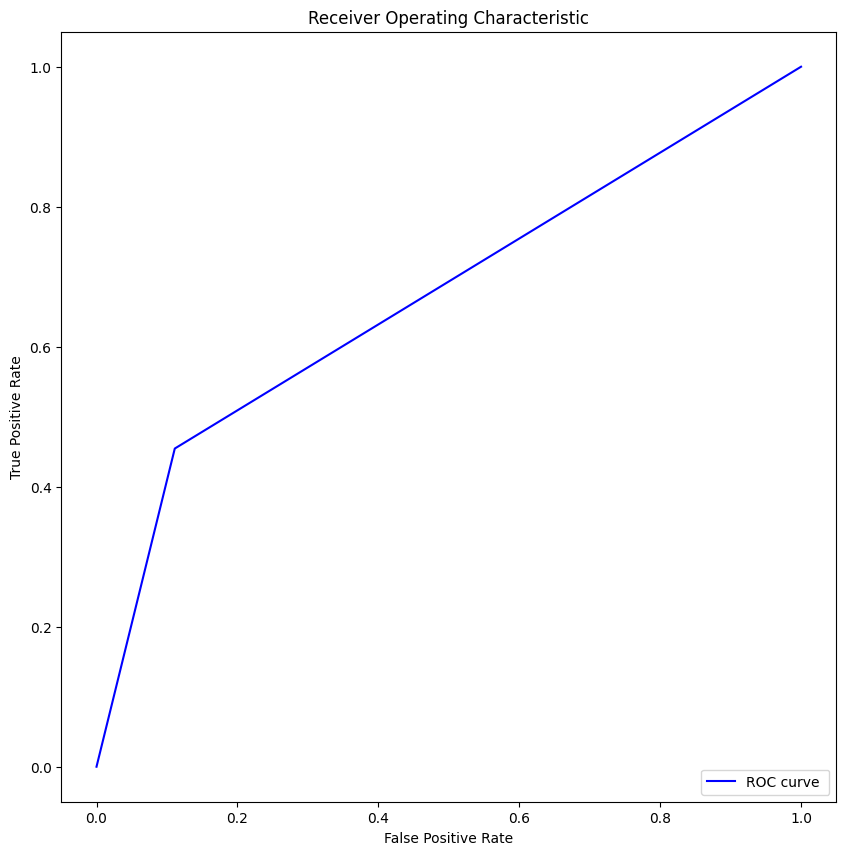

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='blue',label='ROC curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[8 1]
 [6 5]]


program 3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

data=load_digits()
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


ans={'acc':[],'pre':[],'rec':[],'f1':[]}
no_tress=[1,5,10,15,20]

def randa(no_tree):
  f=RandomForestClassifier(n_estimators=no_tree,random_state=42)
  f.fit(X_train,y_train)
  y_pred=f.predict(X_test)

  acc=accuracy_score(y_test,y_pred)
  pre=precision_score(y_test,y_pred,average='weighted')
  rec=recall_score(y_test,y_pred,average='weighted')
  f1=f1_score(y_test,y_pred,average='weighted')

  return acc,pre,rec,f1


for i in no_tress:
  acc,pre,rec,f1=randa(i)
  ans['acc'].append(acc)
  ans['pre'].append(pre)
  ans['rec'].append(rec)
  ans['f1'].append(f1)



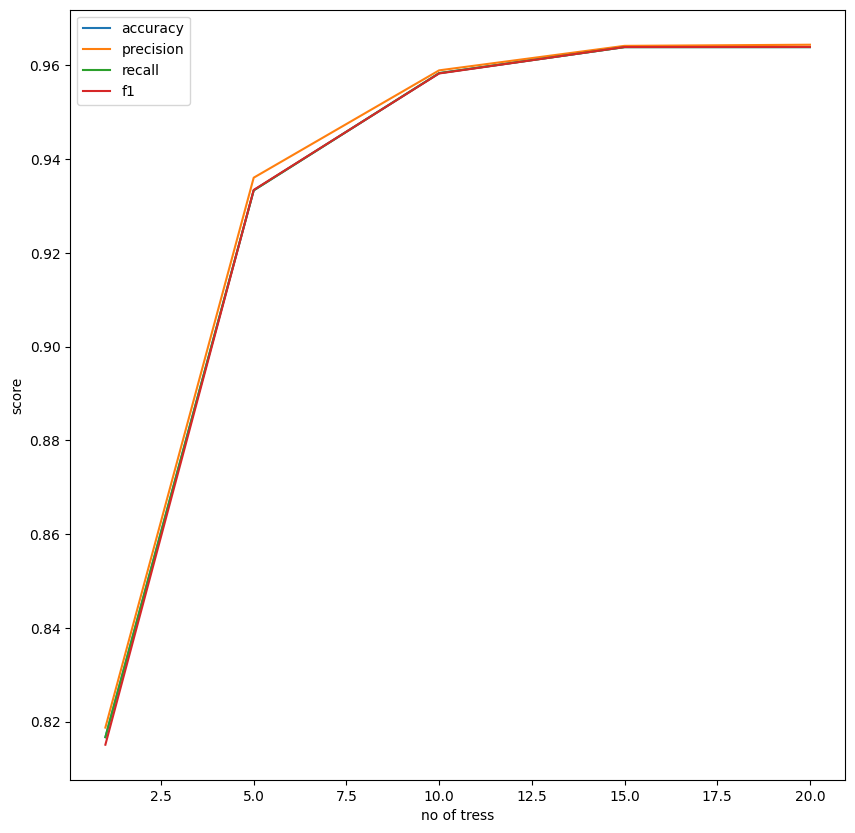

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(no_tress,ans['acc'],label='accuracy')
plt.plot(no_tress,ans['pre'],label='precision')
plt.plot(no_tress,ans['rec'],label='recall')
plt.plot(no_tress,ans['f1'],label='f1')
plt.xlabel('no of tress')
plt.ylabel('score')
plt.legend()
plt.show()

root mean square error: 0.8085168605026132
r2 score: 0.8072059636181392


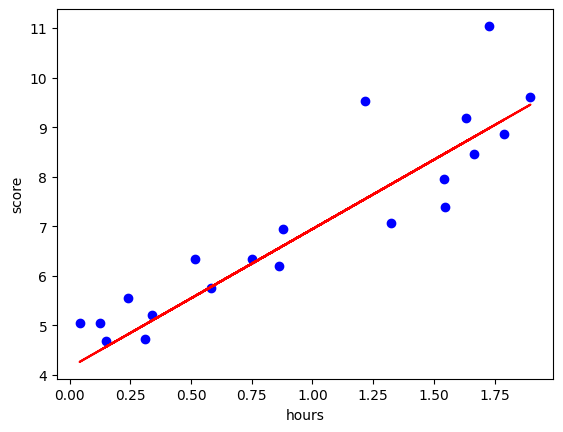

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

np.random.seed(42)

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(f"root mean square error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"r2 score: {r2_score(y_test,y_pred)}")

plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='red')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


program 5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
RMSE: 0.0
R2 Score: 1.0


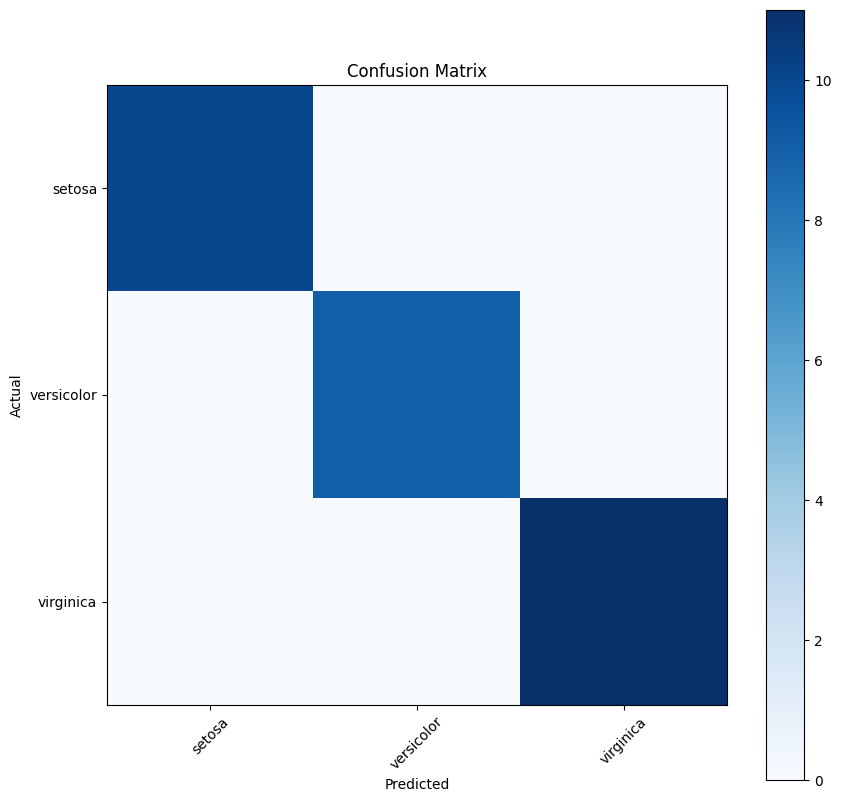

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

conf = confusion_matrix(y_test, y_pred)

# Print performance metrics
print(f'Accuracy: {acc}')
print(f'Precision: {pre}')
print(f'Recall: {rec}')
print(f'F1 Score: {f1}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
class_names = data.target_names
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


program 6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score,classification_report

np.random.seed(42)
no_samples=1000
class1=[1,2]
cov1=[[1,0.5],[0.5,1]]
class2=[4,5]
cov2=[[1,-0.5],[-0.5,1]]

class1data=np.random.multivariate_normal(class1,cov1,no_samples//2)
class2data=np.random.multivariate_normal(class2,cov2,no_samples//2)

X=np.concatenate((class1data,class2data),axis=0)
y=np.concatenate(([0]*np.zeros(no_samples//2),[1]*np.ones(no_samples//2)),axis=0)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=GaussianNB()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

# print(f"accuracy : {acc}")
# print(f"precision : {pre}")
# print(f"recall : {rec}")
# print(f"f1 : {f1}")

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        96
         1.0       0.97      1.00      0.99       104

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



program 8

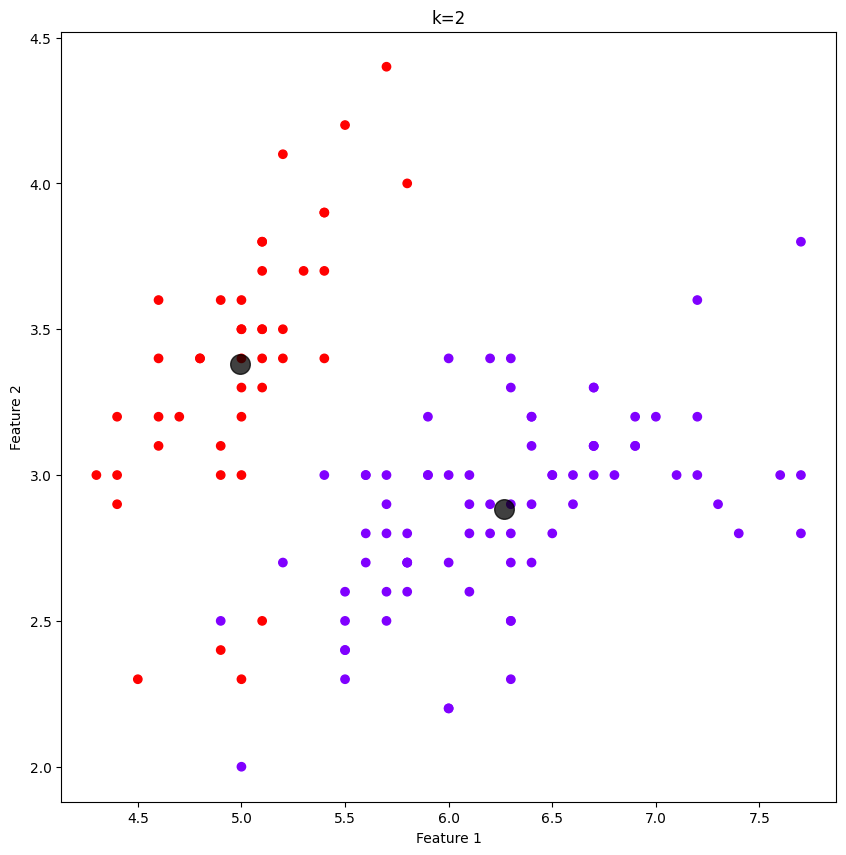

Silhouette Score for k=2: 0.6737153545832795


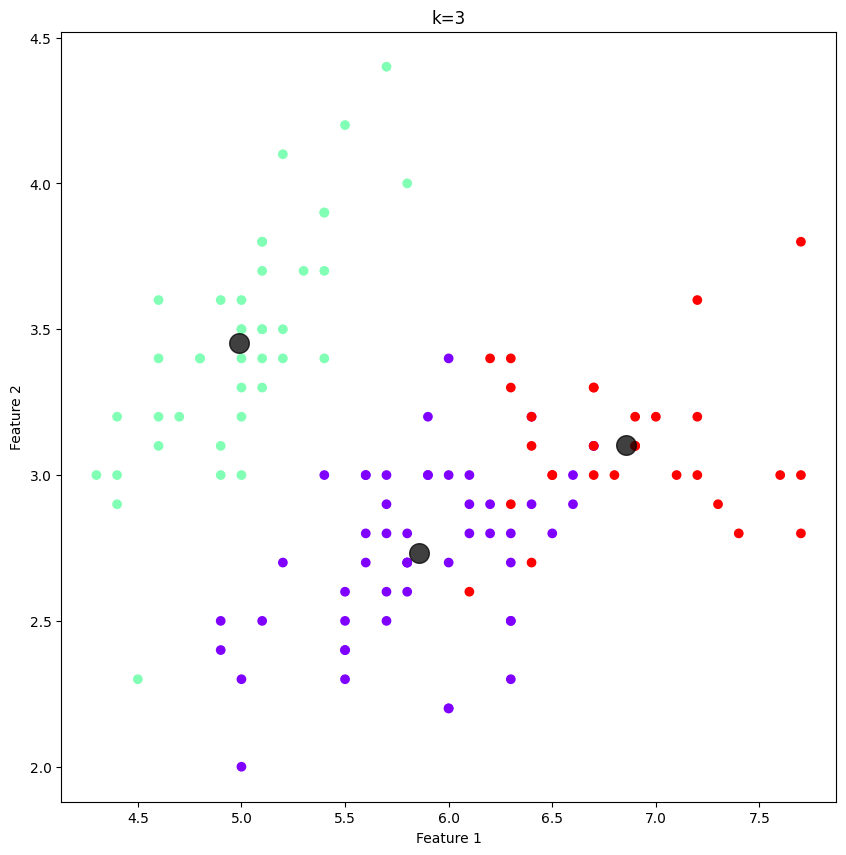

Silhouette Score for k=3: 0.5421223654976185


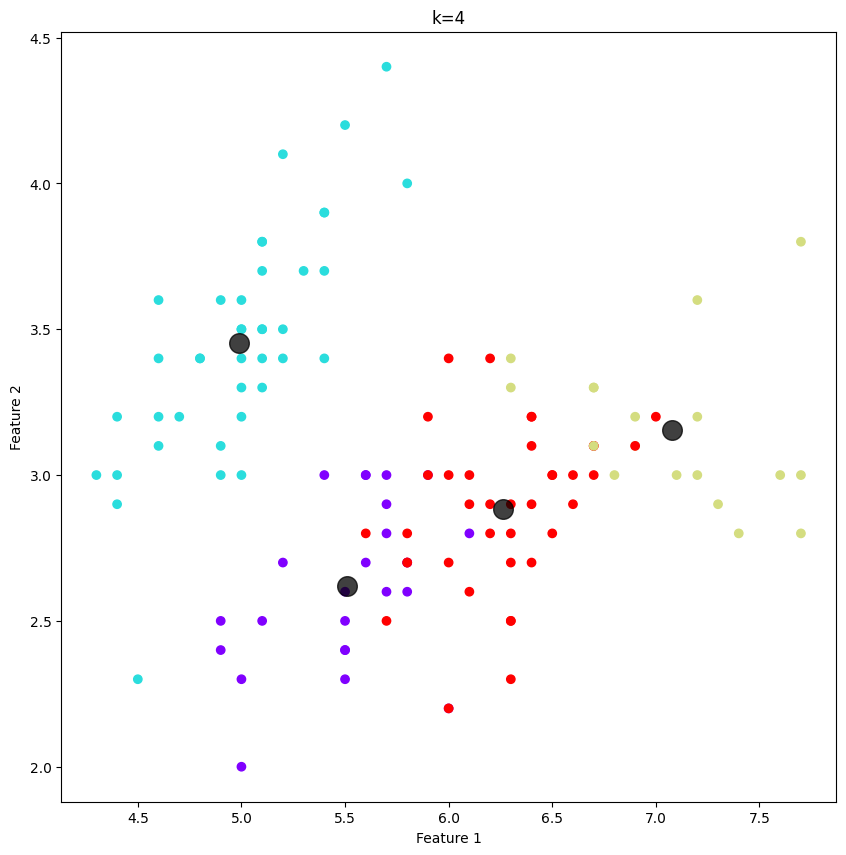

Silhouette Score for k=4: 0.5092929776157145


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score

# Load the iris dataset
iris = load_iris()

# Create DataFrame for features and target
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Function to plot KMeans clustering results
def plot(scaled_features, K_Means, k):
    plt.figure(figsize=(10, 10))
    plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=K_Means.labels_, cmap='rainbow')
    centers = K_Means.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'k={k}')
    plt.show()

# Convert DataFrame to numpy array for KMeans
X_train_np = X_train.to_numpy()

# KMeans with 2 clusters
kmeans2 = KMeans(n_clusters=2, n_init=10)
kmeans2.fit(X_train_np)
plot(X_train_np, kmeans2, 2)
print(f'Silhouette Score for k=2: {silhouette_score(X_train_np, kmeans2.labels_)}')

# KMeans with 3 clusters
kmeans3 = KMeans(n_clusters=3, n_init=10)
kmeans3.fit(X_train_np)
plot(X_train_np, kmeans3, 3)
print(f'Silhouette Score for k=3: {silhouette_score(X_train_np, kmeans3.labels_)}')

# KMeans with 4 clusters
kmeans4 = KMeans(n_clusters=4, n_init=10)
kmeans4.fit(X_train_np)
plot(X_train_np, kmeans4, 4)
print(f'Silhouette Score for k=4: {silhouette_score(X_train_np, kmeans4.labels_)}')


q7

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

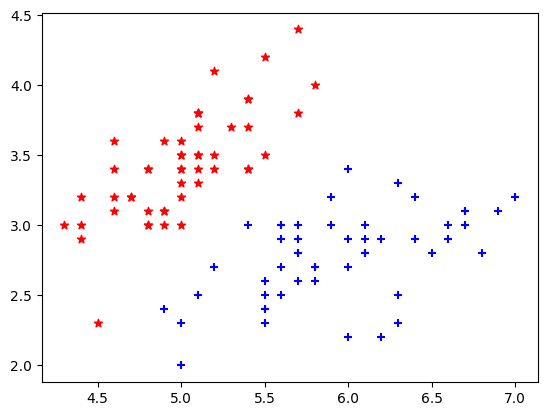

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import load_iris

irir=load_iris()
X=iris.data
y=iris.target

df=pd.DataFrame(X,columns=iris.feature_names)
df['target']=y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

df0=df[:50]
df1=df[50:100]
df2=df[100:]

import matplotlib.pyplot as plt
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')

model=KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred=model.predict(X_test)
y_pred

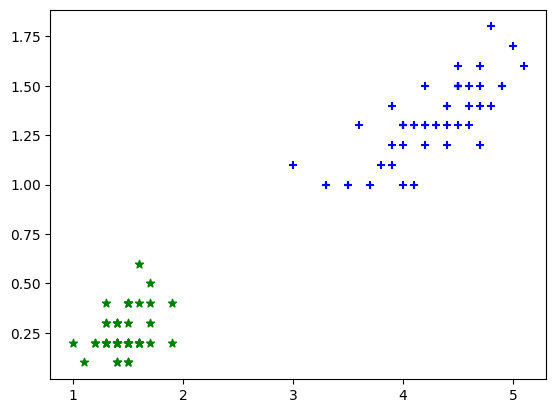

In [ ]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='+')